In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
def classify(path):
  import numpy as np
  import pandas as pd
  #Importing dataset
  dataset= pd.read_csv(path, header=None)
  dataset= dataset.fillna(0)
  #print("Original Dataset")
  #print(dataset.head())

  #Output feature as Y
  Y = dataset.iloc[:, 0]
  #print("Y")
  #print(Y)
  #Features as X
  X = dataset.iloc[:,1:]
  #print("X")
  #print(X)

  #Cross validation to split into training and testing
  from distutils.version import LooseVersion as Version
  from sklearn import __version__ as sklearn_version
  if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
  else:
    from sklearn.model_selection import train_test_split
  print(Version(sklearn_version))
  X_train, X_test, y_train, y_test = train_test_split(
      X, Y, test_size=0.3, random_state=0
  )

  import os
  print("\nAccuracies of the given dataset: "+ os.path.basename(path))


  #1) Perceptron model
  from sklearn.linear_model import Perceptron
  from sklearn.metrics import precision_recall_fscore_support
  from sklearn.metrics import accuracy_score
  from sklearn import metrics

  ppn = Perceptron(eta0=0.01, random_state=0)
  ppn.fit(X_train, y_train)
  y_pred = ppn.predict(X_test)
  print('Perceptron Model: %.2f' % accuracy_score(y_test, y_pred))

  # roc curve for models
  from sklearn.calibration import CalibratedClassifierCV
  clf_isotonic = CalibratedClassifierCV(ppn, cv=10, method='isotonic')
  clf_isotonic.fit(X_train, y_train)

  pred_prob1 = clf_isotonic.predict_proba(X_test)
  #pred_prob1 = ppn.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

  auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])




  #2) Logistic Regression
  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)
  # Predicting the test set result using
  # predict function under LogisticRegression
  y_pred = classifier.predict(X_test)
  print('Logistic Regression: %.2f' % accuracy_score(y_test, y_pred))

  pred_prob2 = classifier.predict_proba(X_test)
  fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
  auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])






  #3) Support Vector Machines
  from sklearn.svm import SVC
  svclassifier = SVC(kernel='linear', probability=True)
  svclassifier.fit(X_train, y_train)
  y_pred = svclassifier.predict(X_test)
  print('Support Vector Machine: %.2f' % accuracy_score(y_test, y_pred))

  pred_prob3 = svclassifier.predict_proba(X_test)
  fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
  auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])





  #4) Naive Bayes Classifier
  from sklearn.naive_bayes import GaussianNB
  #Build a Gaussian Classifier
  model = GaussianNB()
  #Model training
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print('Naive Bayes: %.2f' % accuracy_score(y_test, y_pred))

  pred_prob4 = model.predict_proba(X_test)
  fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
  auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])


  #5) Decesion Tree Classifier
  #Load libraries
  import pandas as pd
  from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
  from sklearn.model_selection import train_test_split # Import train_test_split function
  from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
  #Create Decision Tree classifer object
  clf = DecisionTreeClassifier()
  #Train Decision Tree Classifer
  clf = clf.fit(X_train,y_train)
  #Predict the response for test dataset
  y_pred = clf.predict(X_test)
  print('Decision Tree : %.2f' % accuracy_score(y_test, y_pred))

  pred_prob5 = clf.predict_proba(X_test)
  fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
  auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])

  #6)Random Forest Classifier
  #importing random forest classifier from assemble module
  from sklearn.ensemble import RandomForestClassifier
  # creating a RF classifier
  clf = RandomForestClassifier(n_estimators = 100)
  # Training the model on the training dataset
  # fit function is used to train the model using the training sets as parameters
  clf.fit(X_train, y_train)
  # performing predictions on the test dataset
  y_pred = clf.predict(X_test)
  print('Random Forest: %.2f' % accuracy_score(y_test, y_pred))

  pred_prob6 = clf.predict_proba(X_test)
  fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
  auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])



  #7) KNN Classifier
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 15) #Total samples 2958*0.7. square root of 2958*0.7 is 38.0712
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  #performing predictions on the test dataset
  print('KNN Classifier: %.2f' % accuracy_score(y_test, y_pred))

  pred_prob7 = knn.predict_proba(X_test)
  fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
  auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])

  # roc curve for tpr = fpr
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
  # auc scores
   # matplotlib
  import matplotlib.pyplot as plt
  plt.style.use('seaborn')
# plot roc curves
  plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Perceptron Model')
  plt.plot(fpr7, tpr7, linestyle='--',color='cyan', label='KNN Classifier')
  plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Support Vector Machine')
  plt.plot(fpr4, tpr4, linestyle='--',color='green', label='Naive Bayes')
  plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='Decision Tree ')
  plt.plot(fpr6, tpr6, linestyle='--',color='indigo', label='Random Forest')
  plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Logistic Regression')

  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
   # title
  plt.title('ROC curve')
  #   x label
  plt.xlabel('False Positive Rate')
   # y label
  plt.ylabel('True Positive rate')

  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();


  print("AUC Scores: Sudeb 160")
  print('Peceptron AUC Score : %.2f' % auc_score1)
  print('Logistic Regression AUC Score : %.2f' % auc_score2)
  print('SVM AUC Score : %.2f' % auc_score3)
  print('Naive Bayes AUC Score : %.2f' % auc_score4)
  print('Decision Tree AUC Score : %.2f' % auc_score5)
  print('Random Forest AUC Score : %.2f' % auc_score6)
  print('KNN AUC Score : %.2f' % auc_score7)

# 1 SUDEB255

1.2.2

Accuracies of the given dataset: sudeb255_PCA2.csv
Perceptron Model: 0.60
Logistic Regression: 0.78
Support Vector Machine: 0.76
Naive Bayes: 0.73
Decision Tree : 0.91
Random Forest: 0.87
KNN Classifier: 0.87


<ipython-input-42-b76c41325241>:161: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


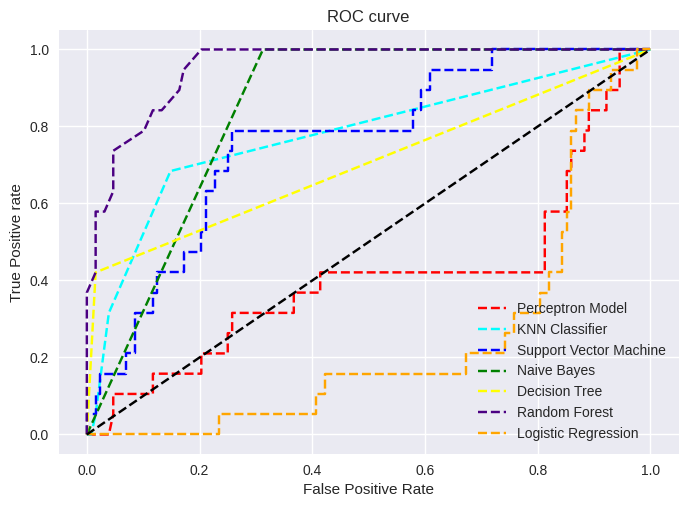

AUC Scores: Sudeb 255
Peceptron AUC Score : 0.41
Logistic Regression AUC Score : 0.24
SVM AUC Score : 0.76
Naive Bayes AUC Score : 0.84
Decision Tree AUC Score : 0.70
Random Forest AUC Score : 0.95
KNN AUC Score : 0.78


In [ ]:
# importing or loading the  origa_gray_vgg16 dataset
path= '/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb255/sudeb255_PCA2.csv'
classify(path)

# 1 SUDEB160

1.2.2

Accuracies of the given dataset: sudeb160_PCA.csv
Perceptron Model: 0.72
Logistic Regression: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support Vector Machine: 0.79
Naive Bayes: 0.61
Decision Tree : 0.92
Random Forest: 0.92
KNN Classifier: 0.91


<ipython-input-45-7c823494b433>:161: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


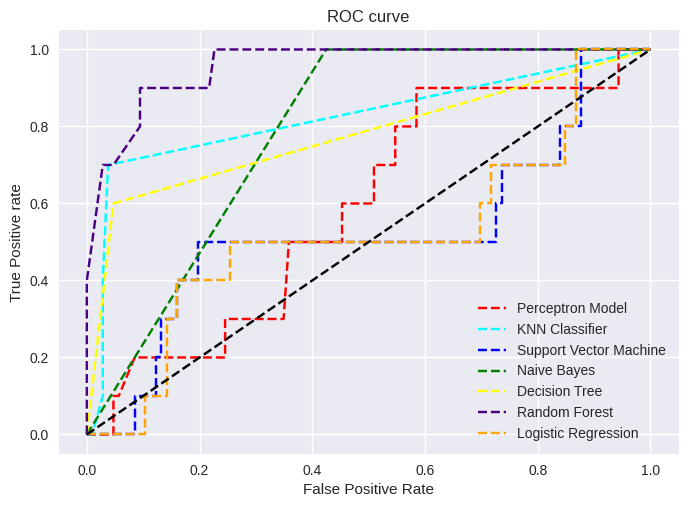

AUC Scores: Sudeb 160
Peceptron AUC Score : 0.59
Logistic Regression AUC Score : 0.52
SVM AUC Score : 0.52
Naive Bayes AUC Score : 0.79
Decision Tree AUC Score : 0.78
Random Forest AUC Score : 0.96
KNN AUC Score : 0.82


In [ ]:
# importing or loading the  origa_gray_vgg16 dataset
path= '/content/drive/MyDrive/STAAR_PROJECT/alzhiemer/Minor_Project/Sudeb160/sudeb160_PCA.csv'
classify(path)

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()